In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import sqlite3
import fiona

In [2]:
sdf=geopandas.read_file('documents/homeworkarchive/p3d/City_Boundaries_in_Minnesota.shp')

In [3]:
sdf2=sdf[['FEATURE_NA','GNIS_FEATU','geometry']]

In [4]:
sdf2=sdf2.rename(index=str,columns={'FEATURE_NA':'RegionName'})

In [5]:
conn = sqlite3.connect('documents/homeworkarchive/p3d/zdat.sqlite')
c = conn.cursor()
ddf = pd.read_sql_query("select * from MonthlyListings;", conn)

In [6]:
cdf=sdf2.merge(ddf, on='RegionName')

In [11]:
prodf=cdf.to_file('documents/homeworkarchive/p3d/pro3geojson.json', driver='GeoJSON')

GeometryTypeValidationError: Record's geometry type does not match collection schema's geometry type: 'MultiPolygon' != 'Polygon'

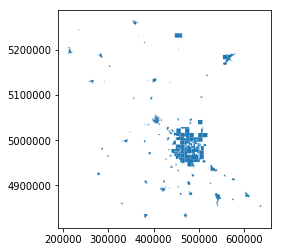

In [10]:
cdf.plot()